# Quora Question Pairs

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bhava\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('questions.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#Taking Smaller SubSet of Data For Easy Computation
new_df=df.sample(3000,random_state=2)

In [5]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    1889
1    1111
Name: is_duplicate, dtype: int64
0    62.966667
1    37.033333
Name: is_duplicate, dtype: float64


<AxesSubplot:>

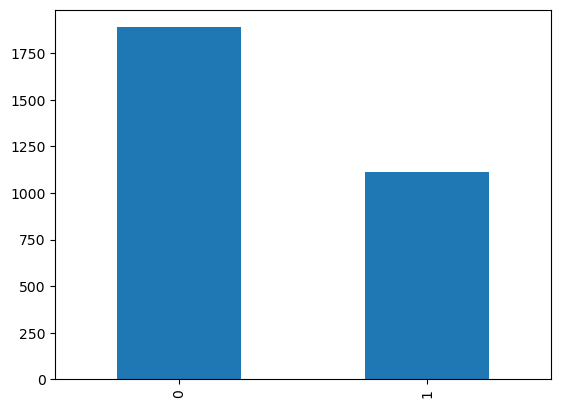

In [7]:
# Distribution of duplicate and non-duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 5998
Number of questions getting repeated 2


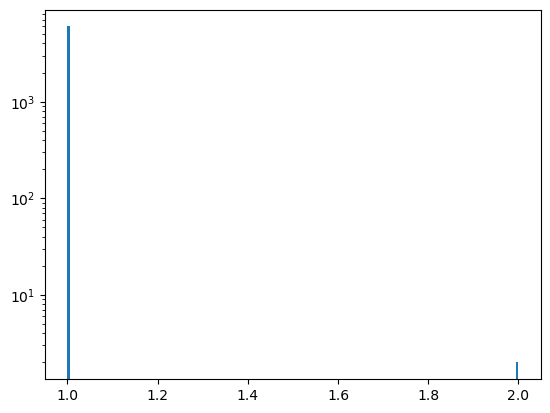

In [9]:
# Distribution of Repeated Questions

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Feature Extraction

In [10]:
#1

new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [11]:
#2

new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [12]:
#3

def common_words(row):
    q1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    q2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(q1 & q2)

In [13]:
new_df['common_words']=new_df.apply(common_words,axis=1)

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [14]:
#4

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [15]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


In [16]:
#5

new_df['word_share']=round(new_df['common_words']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


# Analysis Of Features

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


minimum characters 12
maximum characters 281
average num of characters 60


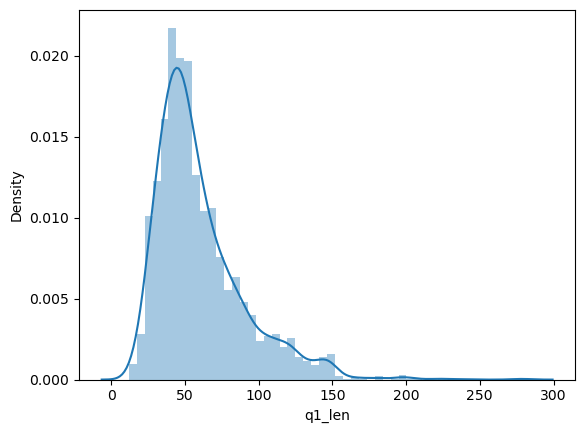

In [17]:
sns.distplot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 12
maximum characters 340
average num of characters 60


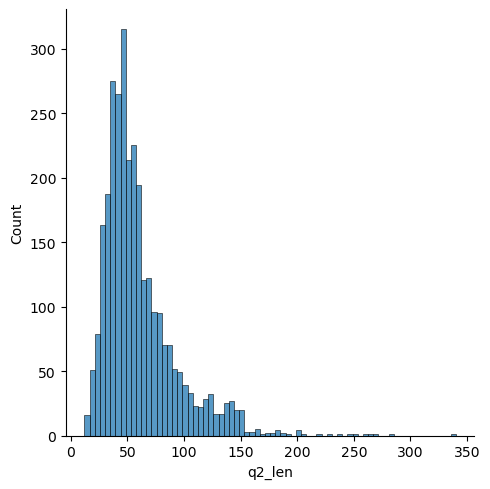

In [18]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 2
maximum words 50
average num of words 11


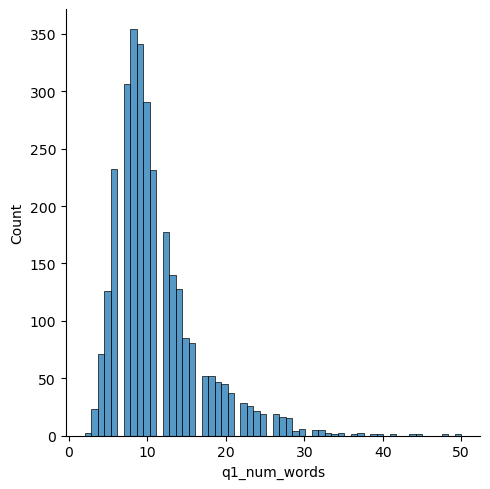

In [19]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 68
average num of words 11


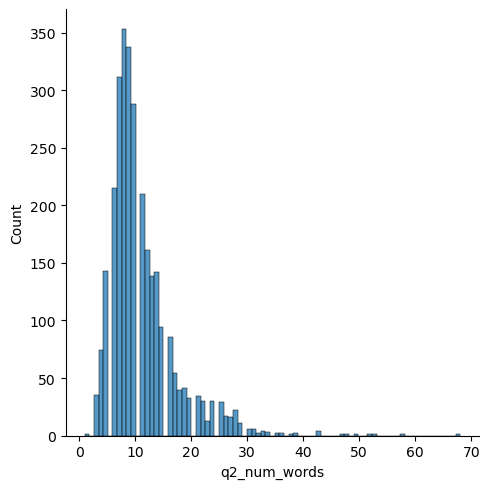

In [20]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


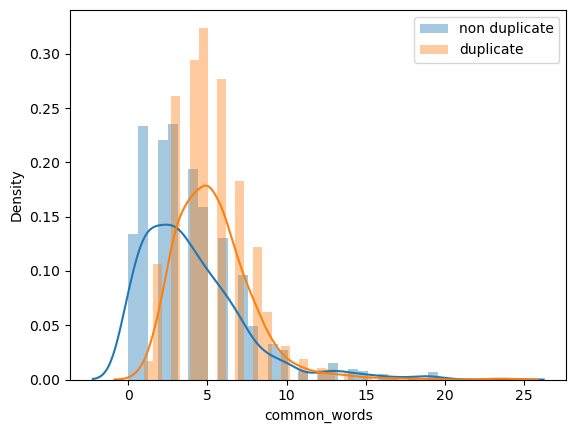

In [21]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


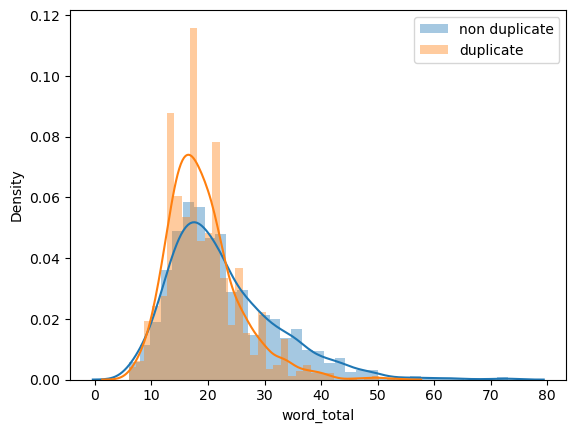

In [22]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


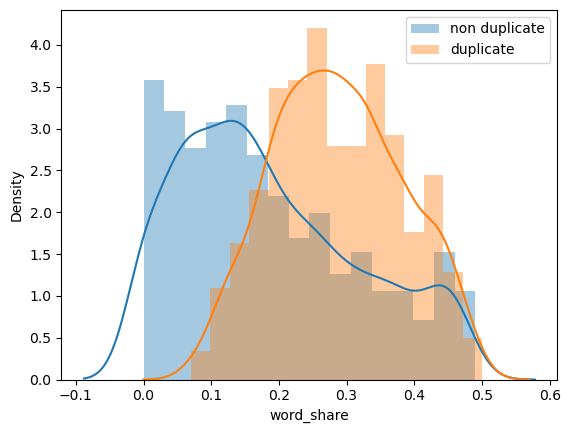

In [23]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [24]:
Que_df=new_df[['question1','question2']]
Que_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [25]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(3000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# merge texts
Questions = list(Que_df['question1']) + list(Que_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(Questions).toarray(),2)

In [27]:
temp1=pd.DataFrame(q1_arr,index=Que_df.index)
temp2=pd.DataFrame(q2_arr,index=Que_df.index)

temp=pd.concat([temp1,temp2],axis=1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
final_df=pd.concat([final_df,temp],axis=1)
print(final_df.shape)
final_df.head()

(3000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7283333333333334

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6966666666666667

Advanced Features¶
1. Token Features

cwc_min: This is the ratio of the number of common words to the length of the smaller question
cwc_max: This is the ratio of the number of common words to the length of the larger question
csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
    
2. Length Based Features

mean_len: Mean of the length of the two questions (number of words)
abs_len_diff: Absolute difference between the length of the two questions (number of words)
longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
3. Fuzzy Features

fuzz_ratio: fuzz_ratio score from fuzzywuzzy
fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
token_sort_ratio: token_sort_ratio from fuzzywuzzy
token_set_ratio: token_set_ratio from fuzzywuzzy